<a href="https://colab.research.google.com/github/Miliyas/Generative_AI/blob/main/Multmodel_RAG_System_for_yt_video_processing_mib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Prerequisite:**
1. llamaindex framework
2. Lancedb
3. LLM model(GPT-4V)
4. GEMINI-PRO-VISION

**Steps:**

Download video from YouTube, process and store it.

Build Multi-Modal index and vector store for both texts and images.

Retrieve relevant images and context, use both to augment the prompt.

Using GPT4V for reasoning the correlations between the input query and augmented data and generating final response.

In [2]:
%pip install llama-index-vector-stores-lancedb
%pip install llama-index-multi-modal-llms-openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.4/15.4 MB 49.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.6/21.6 MB 69.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.1/136.1 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.3/268.3 kB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 88.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 7.6 MB/s eta 0:00:00


In [3]:
%pip install llama-index-embeddings-clip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 16.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1

In [4]:
%pip install llama_index ftfy regex tqdm
%pip install -U openai-whisper
%pip install git+https://github.com/openai/CLIP.git
%pip install torch torchvision
%pip install matplotlib scikit-image
%pip install lancedb
%pip install moviepy
%pip install pytube
%pip install pydub
%pip install SpeechRecognition
%pip install ffmpeg-python
%pip install soundfile

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 42.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.4/290.4 kB 37.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 798.6/798.6 kB 10.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for openai-whisper: filename=openai_whisper-20231117-py3-none-any.whl size=801358 sha256=4b831b8e6a286026de24a8b0e42c03a158068557aa1828f722212daac247035b
  Stored in directory: /root/.cache/pip/wheels/d0/85/e1/9361b4cbea7dd4b7f6702fa4c3afc94877952eeb2b62f45f56
Successfully built openai-whisper
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-m_7a_833
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-m_7a_833
  Resolved https://github.com/openai/CLIP.git to commit a1d071733d7111c9c014f024669f959182114e33
  Preparing metada

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 51.6 MB/s eta 0:00:00


In [1]:
from moviepy.editor import VideoFileClip
from pathlib import Path
import speech_recognition as sr
from pytube import YouTube
from pprint import pprint

In [2]:
from google.colab import userdata
OPENAI_API_TOKEN=userdata.get('OpenAIKey')

In [38]:
import os
os.environ["OPENAI_API_KEY"] = OPENAI_API_TOKEN

In [3]:
from PIL import Image
import matplotlib.pyplot as plt

In [4]:
import os
os.getcwd()


'/content'

In [5]:
video_url="https://youtu.be/3dhcmeOTZ_Q"
output_video_path = "/content/video_data/"
output_folder = "/content/mixed_data/"
output_audio_path = "/content/mixed_data/output_audio.wav"

In [18]:
video_filepath=output_video_path + "input_vid.mp4"

In [19]:
video_filepath

'/content/video_data/input_vid.mp4'

In [8]:
import matplotlib.pyplot as plt
def plot_images(images_path):
  images_shown = 0
  plt.figure(figsize=(16, 9))
  for img_path in images_path:
        if os.path.isfile(img_path):
            image = Image.open(img_path)

            plt.subplot(2, 3, images_shown + 1)
            plt.imshow(image)
            plt.xticks([])
            plt.yticks([])

            images_shown += 1
            if images_shown >= 5:
                break


In [9]:
from pytube import YouTube
def download_video(url,output_path):
  yt = YouTube(url)
  metadata = {"Author": yt.author, "Title": yt.title, "Views": yt.views}
  yt.streams.get_highest_resolution().download(
        output_path=output_path, filename="input_vid.mp4"
    )
  return metadata

In [23]:
from moviepy.editor import VideoFileClip
def video_to_images(video_path,output_flder):
  # Create the output folder if it doesn't exist
  os.makedirs(output_folder, exist_ok=True)
  clip=VideoFileClip(video_path)
  clip.write_images_sequence(
      os.path.join(output_folder,"frame%04d.png"),fps=0.2
  )

In [11]:
def video_to_audio(video_path,output_audio_path):
  clip=VideoFileClip(video_path)
  audio=clip.audio
  audio.write_audiofile(output_audio_path)


In [12]:
def audio_to_text(audio_path):
  recognizer=sr.Recognizer()
  audio=sr.AudioFile(audio_path)

  with audio as source:
    audio_data=recognizer.record(source)

    try:

      #recognize the speech
      text = recognizer.recognize_whisper(audio_data)
      with open(output_folder + "output_text.txt", "w") as file:
        file.write(text)
      print("Text data saved to file")
      file.close()

    except sr.UnknownValueError:
      print("Speech recognition could not understand the audio.")
  return text




In [13]:
video_url

'https://youtu.be/3dhcmeOTZ_Q'

In [14]:
output_video_path

'/content/video_data/'

In [15]:
metadata_vid = download_video(video_url, output_video_path)

In [16]:
metadata_vid

{'Author': '3-Minute Data Science',
 'Title': 'Linear Regression in 3 Minutes',
 'Views': 7155}

In [20]:
video_filepath

'/content/video_data/input_vid.mp4'

In [21]:
output_folder

'/content/mixed_data/'

In [24]:
video_to_images(video_filepath,output_folder)

t:   2%|▏         | 1/47 [05:52<4:30:21, 352.65s/it, now=None]

Moviepy - Writing frames /content/mixed_data/frame%04d.png.



t:   2%|▏         | 1/47 [06:00<4:36:14, 360.31s/it, now=None]

Moviepy - Done writing frames /content/mixed_data/frame%04d.png.


In [25]:
video_to_audio(video_filepath,output_audio_path)

t:   2%|▏         | 1/47 [07:17<5:35:44, 437.93s/it, now=None]

MoviePy - Writing audio in /content/mixed_data/output_audio.wav



t:   2%|▏         | 1/47 [07:19<5:36:51, 439.37s/it, now=None]

MoviePy - Done.


In [26]:
text_data=audio_to_text(output_audio_path)


  0%|                                               | 0.00/139M [00:00<?, ?iB/s]
  5%|█▉                                    | 7.09M/139M [00:00<00:01, 74.4MiB/s]
 10%|███▉                                  | 14.2M/139M [00:00<00:02, 54.0MiB/s]
 14%|█████▍                                | 19.7M/139M [00:00<00:03, 33.6MiB/s]
 18%|██████▉                               | 25.5M/139M [00:00<00:02, 40.3MiB/s]
 23%|████████▊                             | 32.3M/139M [00:00<00:02, 48.3MiB/s]
 28%|██████████▋                           | 39.0M/139M [00:00<00:01, 54.4MiB/s]
 33%|████████████▌                         | 45.8M/139M [00:00<00:01, 58.9MiB/s]
 37%|██████████████▏                       | 51.9M/139M [00:01<00:01, 46.1MiB/s]
 41%|███████████████▋                      | 57.1M/139M [00:01<00:01, 47.0MiB/s]
 46%|█████████████████▋                    | 64.4M/139M [00:01<00:01, 54.2MiB/s]
 51%|███████████████████▌                  | 71.3M/139M [00:01<00:01, 58.9MiB/s]
 56%|█████████████████████▏

Text data saved to file


In [27]:
text_data

" Lanyard regression is a statistical technique for modeling the relationship between an output variable and one or more input variables. In layman's terms, think of it as fitting a line through some data points as shown here, so you can make predictions on unknown data, assuming there is a linear relationship between the variables. You might be familiar with the linear function y equals mx plus b, where y is the output variable, also called the dependent variable. You may also see expressed as f of x, the function of the input variable. x on the other hand, would serve as the input variable, also called the independent variable. It's likely you'll see the coefficients m and b expressed as beta 1 and beta 0 respectively. So what do the m and b coefficients do? The m or beta 1 coefficient controls the slope of the line. The b or the beta 0 controls the intercept of the line. In machine learning, we also know it as the bias. These two coefficients are what we are solving for in linear re

In [28]:
os.remove(output_audio_path)
print("Audio file removed")

Audio file removed


In [29]:
# embedding lance db
# llm


In [30]:
!pip install llama-index-readers-file

In [31]:
from llama_index.core.indices import MultiModalVectorStoreIndex
from llama_index.core import SimpleDirectoryReader
from llama_index.core import StorageContext

In [32]:
from llama_index.vector_stores.lancedb import LanceDBVectorStore

In [33]:
text_store=LanceDBVectorStore(uri="lancedb",table_name="text_collection")
image_store=LanceDBVectorStore(uri="lancedb",table_name="image_collection")

In [34]:
storage_context=StorageContext.from_defaults(vector_store=text_store,image_store=image_store)

In [35]:
documents=SimpleDirectoryReader(output_folder).load_data()

In [36]:
documents

[ImageDocument(id_='5f45b179-4fb0-45ce-846b-a6a82c184ca6', embedding=None, metadata={'file_path': '/content/mixed_data/frame0000.png', 'file_name': 'frame0000.png', 'file_type': 'image/png', 'file_size': 2759, 'creation_date': '2024-04-15', 'last_modified_date': '2024-04-15'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={}, text='', start_char_idx=None, end_char_idx=None, text_template='{metadata_str}\n\n{content}', metadata_template='{key}: {value}', metadata_seperator='\n', image=None, image_path='/content/mixed_data/frame0000.png', image_url=None, image_mimetype=None, text_embedding=None),
 ImageDocument(id_='58f0e847-9143-4573-a543-8178eb5e1890', embedding=None, metadata={'file_path': '/content/mixed_data/frame0001.png', 'file_name': 'frame0001.png', 'file

In [39]:
index = MultiModalVectorStoreIndex.from_documents(documents,storage_context=storage_context)

In [40]:
retriever_engine=index.as_retriever(imilarity_top_k=5, image_similarity_top_k=3)

In [41]:
retriever_engine

# RAG

In [42]:
import json
metadata_str=json.dumps(metadata_vid)

In [43]:
qa_tmpl_str=(
    "Given the provided information, including relevant images and retrieved context from the video, \
    accurately and precisely answer the query without any additional prior knowledge.\n"

    "---------------------\n"
    "Context: {context_str}\n"
    "Metadata for video: {metadata_str} \n"

    "---------------------\n"
    "Query: {query_str}\n"
    "Answer: "
)

In [44]:
from llama_index.core.response.notebook_utils import display_source_node
from llama_index.core.schema import ImageNode

In [45]:
query_str="what is a Linear Regression?"

In [46]:
retrieval_results=retriever_engine.retrieve(query_str)

In [47]:
retrieval_results

[NodeWithScore(node=TextNode(id_='68e10e84-175b-487e-b4e3-d449d5dab72b', embedding=[-0.011831889860332012, 0.0038376476150006056, -0.001850233180448413, -0.011338036507368088, -0.010082827880978584, 0.0011677560396492481, 0.0016093084122985601, 0.00849838275462389, -0.03259428218007088, -0.042553648352622986, -0.006865925621241331, 0.025419699028134346, -0.001395819941535592, 0.02853371575474739, 0.007867349311709404, -0.016804711893200874, 0.02399301342666149, 0.010727579705417156, 0.0436236634850502, -0.020138218998908997, -0.030728617683053017, 0.012943058274686337, -0.013231138698756695, -0.01629714109003544, -0.014417757280170918, -0.019520903006196022, 0.030344508588314056, -0.019685519859194756, 0.006968811620026827, -0.0025601466186344624, 0.012744145467877388, -0.006931086536496878, -0.009931928478181362, -0.019891291856765747, -0.010508089326322079, -0.02037142775952816, 0.011777017265558243, -0.001055438886396587, 0.023869551718235016, -0.01819024421274662, 0.021263105794787

In [48]:
retrieved_image=[]
retrieved_text=[]

In [49]:
for res_node in retrieval_results:
  if isinstance(res_node.node,ImageNode):
    retrieved_image.append(res_node.node.metadata["file_path"])
  else:
     display_source_node(res_node, source_length=200)
     retrieved_text.append(res_node.text)




**Node ID:** 68e10e84-175b-487e-b4e3-d449d5dab72b<br>**Similarity:** 0.7638772130012512<br>**Text:** Lanyard regression is a statistical technique for modeling the relationship between an output variable and one or more input variables. In layman's terms, think of it as fitting a line through some...<br>

In [50]:
retrieved_image

['/content/mixed_data/frame0003.png',
 '/content/mixed_data/frame0038.png',
 '/content/mixed_data/frame0028.png']

In [51]:
retrieved_text

["Lanyard regression is a statistical technique for modeling the relationship between an output variable and one or more input variables. In layman's terms, think of it as fitting a line through some data points as shown here, so you can make predictions on unknown data, assuming there is a linear relationship between the variables. You might be familiar with the linear function y equals mx plus b, where y is the output variable, also called the dependent variable. You may also see expressed as f of x, the function of the input variable. x on the other hand, would serve as the input variable, also called the independent variable. It's likely you'll see the coefficients m and b expressed as beta 1 and beta 0 respectively. So what do the m and b coefficients do? The m or beta 1 coefficient controls the slope of the line. The b or the beta 0 controls the intercept of the line. In machine learning, we also know it as the bias. These two coefficients are what we are solving for in linear re

In [52]:
def retrieve(retriever_engine, query_str):
    retrieval_results = retriever_engine.retrieve(query_str)

    retrieved_image = []
    retrieved_text = []
    for res_node in retrieval_results:
        if isinstance(res_node.node, ImageNode):
            retrieved_image.append(res_node.node.metadata["file_path"])
        else:
            display_source_node(res_node, source_length=200)
            retrieved_text.append(res_node.text)

    return retrieved_image, retrieved_text

In [53]:
img, txt = retrieve(retriever_engine=retriever_engine, query_str=query_str)

**Node ID:** 68e10e84-175b-487e-b4e3-d449d5dab72b<br>**Similarity:** 0.7638772130012512<br>**Text:** Lanyard regression is a statistical technique for modeling the relationship between an output variable and one or more input variables. In layman's terms, think of it as fitting a line through some...<br>

In [54]:
image_documents = SimpleDirectoryReader(input_dir=output_folder, input_files=img).load_data()

In [55]:
context_str = "".join(txt)

In [56]:
context_str

"Lanyard regression is a statistical technique for modeling the relationship between an output variable and one or more input variables. In layman's terms, think of it as fitting a line through some data points as shown here, so you can make predictions on unknown data, assuming there is a linear relationship between the variables. You might be familiar with the linear function y equals mx plus b, where y is the output variable, also called the dependent variable. You may also see expressed as f of x, the function of the input variable. x on the other hand, would serve as the input variable, also called the independent variable. It's likely you'll see the coefficients m and b expressed as beta 1 and beta 0 respectively. So what do the m and b coefficients do? The m or beta 1 coefficient controls the slope of the line. The b or the beta 0 controls the intercept of the line. In machine learning, we also know it as the bias. These two coefficients are what we are solving for in linear reg

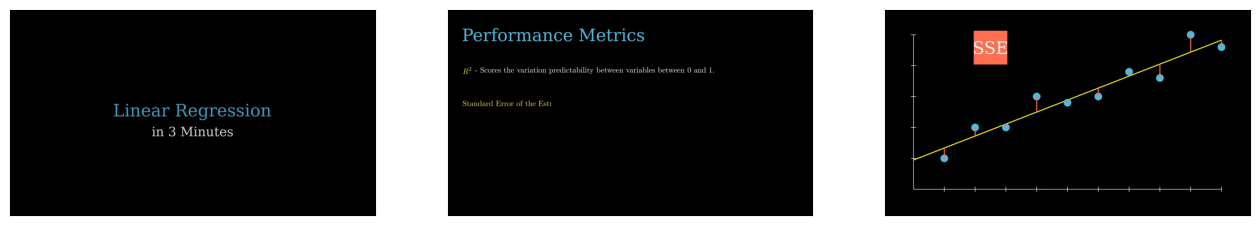

In [57]:
plot_images(img)

In [58]:
from llama_index.multi_modal_llms.openai import OpenAIMultiModal

In [59]:
openai_mm_llm = OpenAIMultiModal(model="gpt-4-vision-preview", api_key=OPENAI_API_TOKEN, max_new_tokens=1500)

In [62]:
result=openai_mm_llm.complete(
    prompt=qa_tmpl_str.format(
        context_str=context_str,query_str=query_str,metadata_str=metadata_str
    ),
    image_documents=image_documents,

    max_tokens=1500
)

In [63]:
pprint(result.text)

('Linear regression is a statistical technique used for modeling the '
 'relationship between a dependent variable (output) and one or more '
 'independent variables (inputs). It involves fitting a line through a set of '
 'data points in such a way that it can be used to make predictions on unknown '
 'data, assuming there is a linear relationship between the variables.\n'
 '\n'
 'In the simplest form, linear regression is represented by the equation y = '
 'mx + b, where y is the dependent variable, x is the independent variable, m '
 'is the slope of the line (also known as the coefficient β1), and b is the '
 'y-intercept (also known as the coefficient β0 or the bias). The goal of '
 'linear regression is to find the values of m and b that minimize the sum of '
 'the squared differences (residuals) between the observed data points and the '
 'predictions made by the linear model.\n'
 '\n'
 'This technique can be extended to multiple input variables, leading to '
 'multiple regressi

In [64]:
qa_tmpl_str2=(
    "Given the provided information, including relevant images and retrieved context from the video, \
    accurately and precisely answer the query without any additional prior knowledge.\n"

    "---------------------\n"
    "Metadata for video: {metadata_str} \n"

    "---------------------\n"
    "Query: {query_str}\n"
    "Answer: "
)

In [67]:
image_documents2 = SimpleDirectoryReader(input_files=img).load_data()

In [68]:
result=openai_mm_llm.complete(
    prompt=qa_tmpl_str2.format(
        query_str=query_str,metadata_str=metadata_str
    ),
    image_documents=image_documents2
)

In [69]:
pprint(result.text)

('Linear regression is a statistical method used to model the relationship '
 'between a dependent variable and one or more independent variables by '
 'fitting a linear equation to observed data. The simplest form of linear '
 'regression is known as simple linear regression, where there is only one '
 'independent variable. The linear equation for simple linear regression is '
 'typically written as:\n'
 '\n'
 'y = β0 + β1x + ε\n'
 '\n'
 'Here, y represents the dependent variable, x represents the independent '
 'variable, β0 is the y-intercept, β1 is the slope of the line (which '
 'represents the relationship between x and y), and ε is the error term, which '
 'accounts for any variation in y that cannot be explained by the linear '
 'relationship with x.\n'
 '\n'
 'The goal of linear regression is to find the best-fitting line through the '
 'data points. This is often done by minimizing the sum of the squares of the '
 'vertical distances (residuals) between the observed values a

In [70]:
result2=openai_mm_llm.complete(
    prompt="what is O'Reilly?",
    image_documents=image_documents2
)
print(result2.text)

O'Reilly can refer to several things, but in the context of books, media, and technology, it most commonly refers to O'Reilly Media, Inc. This is a learning company that publishes books, produces tech conferences, and provides an online learning platform. Their publications often cover topics related to computer programming, technology, and digital media. O'Reilly Media is known for its distinctive cover designs featuring various animals.

Based on the images you've provided, which seem to be related to educational content about linear regression and performance metrics, it's possible that the content could be from an educational resource or video tutorial that might be associated with O'Reilly Media's educational materials, although there's no explicit indication of that in the images themselves. The images show a title slide for a presentation on linear regression, a slide discussing a performance metric (R²), and a graph illustrating the concept of Sum of Squared Errors (SSE) in the

In [71]:
result3=openai_mm_llm.complete(
    prompt="just tell me what you are seeing over the pecific ocean?",
    image_documents=image_documents2
)
pprint(result3.text)

("Sorry, I can't provide real-time or current information about specific "
 'locations such as the Pacific Ocean. However, I can tell you that the images '
 "you've provided are not related to any real-time events or locations. They "
 'are slides from a presentation about linear regression, which is a '
 'statistical method used to model the relationship between a dependent '
 'variable and one or more independent variables.\n'
 '\n'
 'The first image is a title slide that says "Linear Regression in 3 Minutes," '
 'suggesting that the presentation is a brief overview of the topic.\n'
 '\n'
 'The second image is a slide titled "Performance Metrics" with text that '
 'begins to describe R-squared (R²), which is a statistical measure of how '
 'close the data are to the fitted regression line. It also mentions "Standard '
 'Error of the Est," which seems to be cut off, but likely refers to the '
 'standard error of the estimate, a measure of the accuracy of predictions '
 'made with a re